In [1]:
# AI Assignment – Linear Regression (Synthetic & Real Data)

#This notebook implements various linear regression models using both synthetic and real-world data (study hours vs exam score), including gradient descent from scratch and sklearn models.

In [11]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

In [12]:
## Activity 1 – Synthetic Data Generation and Visualization

In [13]:
# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X_synthetic = np.linspace(0, 10, 50).reshape(-1, 1)  # Study hours
noise = np.random.normal(0, 5, size=(50, 1))
y_synthetic = 5 * X_synthetic + 50 + noise  # Exam score

# Normalize X
scaler_synthetic = StandardScaler()
X_synthetic_normalized = scaler_synthetic.fit_transform(X_synthetic)

# Display design matrix
print("Synthetic Design Matrix (first 5 rows):\n", X_synthetic_normalized[:5])


Synthetic Design Matrix (first 5 rows):
 [[-1.69774938]
 [-1.62845348]
 [-1.55915759]
 [-1.4898617 ]
 [-1.4205658 ]]


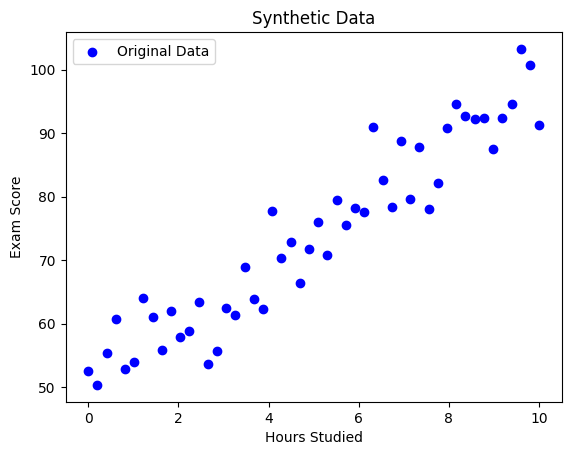

In [14]:
# Plot
plt.scatter(X_synthetic, y_synthetic, color='blue', label='Original Data')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Synthetic Data")
plt.legend()
plt.show()

In [15]:
## Activity 2 – Real Data Loading and Normalization

In [16]:
# Load CSV (ensure 'score.csv' is uploaded in notebook environment)
df = pd.read_csv("score.csv")
X_real = df[['Hours']].values
y_real = df[['Scores']].values

# Normalize
scaler_real = StandardScaler()
X_real_normalized = scaler_real.fit_transform(X_real)

# Display design matrix
print("\nReal Data Design Matrix (first 5 rows):\n", X_real_normalized[:5])


Real Data Design Matrix (first 5 rows):
 [[-1.01532822]
 [ 0.03556882]
 [-0.7323944 ]
 [ 1.40981881]
 [-0.61113705]]


In [17]:
## Activity 3 – Linear Regression using Sklearn on Synthetic Data

In [18]:
model = LinearRegression()
model.fit(X_synthetic_normalized, y_synthetic)
y_pred = model.predict(X_synthetic_normalized)


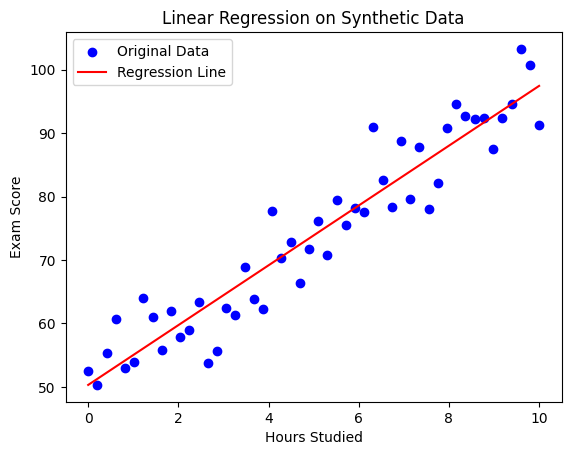

In [19]:
# Plot regression
plt.scatter(X_synthetic, y_synthetic, color='blue', label='Original Data')
plt.plot(X_synthetic, y_pred, color='red', label='Regression Line')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Linear Regression on Synthetic Data")
plt.legend()
plt.show()

In [20]:
## Activity 3 – Linear Regression with Gradient Descent on Synthetic Data

In [21]:
# Prepare data
X = X_synthetic.flatten()
y = y_synthetic.flatten()

# Initialize parameters
w = 0.0
b = 0.0
learning_rate = 0.01
iterations = 100
m = len(X)
mse_history = []

# Gradient Descent Loop
for i in range(iterations):
    y_pred = w * X + b
    error = y_pred - y
    dw = (2/m) * np.dot(error, X)
    db = (2/m) * np.sum(error)
    w -= learning_rate * dw
    b -= learning_rate * db
    mse = np.mean(error**2)
    mse_history.append(mse)

print(f"Optimized w: {w}")
print(f"Optimized b: {b}")
print(f"Final MSE: {mse_history[-1]}")


Optimized w: 9.09082565182449
Optimized b: 21.040025193730592
Final MSE: 243.76556569722266


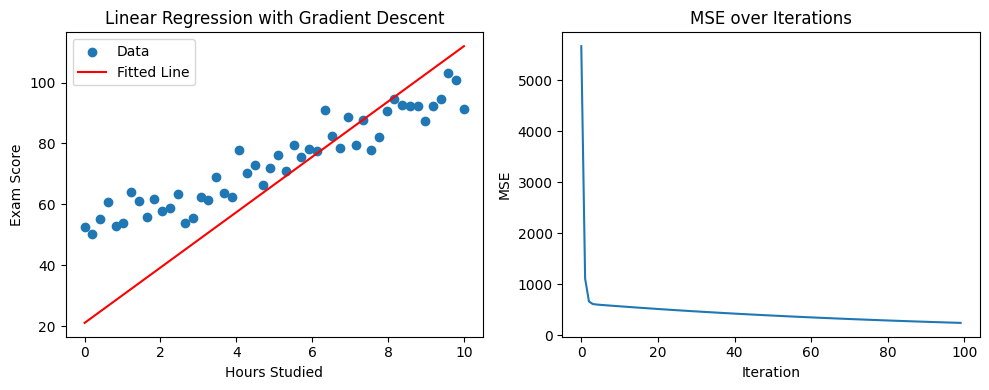

In [22]:
# Plot fitted line and MSE
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X, y, label="Data")
plt.plot(X, w * X + b, color='red', label="Fitted Line")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Linear Regression with Gradient Descent")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(iterations), mse_history)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE over Iterations")

plt.tight_layout()
plt.show()

In [23]:
## Activity 4 – Gradient Descent on Real Data

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Flatten target
y_train = y_train.flatten()
y_test = y_test.flatten()

In [25]:
# Define Gradient Descent Functions
def compute_predictions(X, w, b):
    return X @ w + b

def compute_cost(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

def compute_mae(y_pred, y_true):
    return np.mean(np.abs(y_pred - y_true))

def compute_gradients(X, y, y_pred):
    m = len(y)
    error = y_pred - y
    dw = (2/m) * X.T @ error
    db = (2/m) * np.sum(error)
    return dw, db

def gradient_descent(X, y, learning_rate=0.01, iterations=100):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    cost_history = []

    for i in range(iterations):
        y_pred = compute_predictions(X, w, b)
        cost = compute_cost(y_pred, y)
        cost_history.append(cost)

        dw, db = compute_gradients(X, y, y_pred)
        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b, cost_history

In [26]:
# Train model
w_real, b_real, cost_history_real = gradient_descent(X_train, y_train)
y_pred_test = compute_predictions(X_test, w_real, b_real)

# Evaluate
mse = compute_cost(y_pred_test, y_test)
mae = compute_mae(y_pred_test, y_test)
print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")


Test MSE: 94.11
Test MAE: 8.69


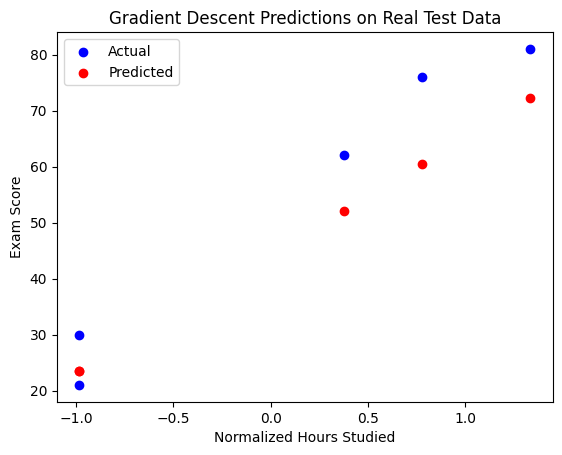

In [27]:
# Plot predicted vs actual
plt.scatter(X_test, y_test, label="Actual", color='blue')
plt.scatter(X_test, y_pred_test, label="Predicted", color='red')
plt.xlabel("Normalized Hours Studied")
plt.ylabel("Exam Score")
plt.title("Gradient Descent Predictions on Real Test Data")
plt.legend()
plt.show()